# Content

1. data
2. train test split
3. KNN **(98% accuracy)**
    1. plot knn score
    2. finding best k value
    3. KNN model
4. Support Vector Machine Model (SVC) **(89% accuracy)**
5. Naive Bayes Model **(100% accuracy)**
6. Logistic Regression Model **(96% accuracy)**
    1. initializing w,b
    2. sigmoid function
    3. forward and backward propagation
    4. updating weight and bias
    5. prediction function
    6. logistic regression model
    7. model testing

# 1. Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("penguins_classification.csv")

In [6]:
df.info()
print(df.isna().sum())
print("Total null values = ",df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64
Total null values =  0


In [7]:
# drop useless values
df.drop(["island"],axis=1,inplace=True)

In [10]:
Adelie = df[df.species == "Adelie"]
Gentoo = df[df.species == "Gentoo"]

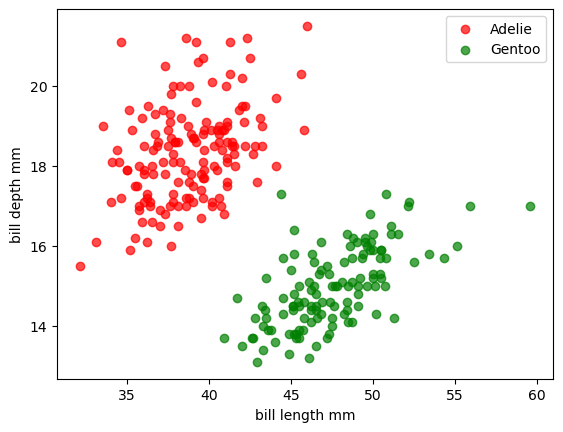

In [13]:
# plot data
plt.scatter(Adelie.bill_length_mm,Adelie.bill_depth_mm,color = "red",label="Adelie",alpha = 0.7)
plt.scatter(Gentoo.bill_length_mm,Gentoo.bill_depth_mm,color = "green",label = "Gentoo",alpha = 0.7)
plt.xlabel("bill length mm")
plt.ylabel("bill depth mm")
plt.legend()
plt.show()

In [14]:
# Converting object values to numeric
df.species = [1 if each == "Adelie" else 0 for each in df.species]

In [16]:
#x and y
x_data = df.drop(["species"],axis=1)
y = df.species.values

In [17]:
# Normalization
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

# 2. Train test split

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 3. KNN

> A. plot knn score

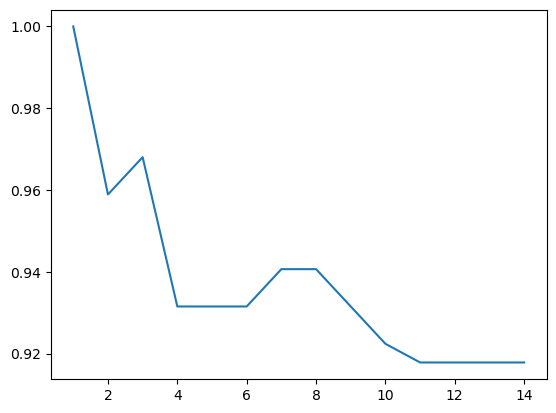

In [23]:
from sklearn.neighbors import KNeighborsClassifier

score_list = []

for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_train.values,y_train))
    
plt.plot(range(1,15),score_list)

We can see best n_neigbors value in the plot. it is 1. Lets see in Code

> B. finding best k value

In [25]:
best_k = 0

for i in range(len(score_list)):
    
    if score_list[i] > score_list[best_k]:
        best_k = i

best_k = best_k+1 # because score_list[0] k=1, score_list[1] k=2,..., score_list[n] k=n+1

print(score_list)
print("Best k value: ",best_k)

[1.0, 0.958904109589041, 0.9680365296803652, 0.9315068493150684, 0.9315068493150684, 0.9315068493150684, 0.9406392694063926, 0.9406392694063926, 0.9315068493150684, 0.9223744292237442, 0.9178082191780822, 0.9178082191780822, 0.9178082191780822, 0.9178082191780822]
Best k value:  1


> C. KNN Model

In [27]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)
print("{} nn score: {}".format(best_k,knn.score(x_test.values,y_test)))

1 nn score: 0.9818181818181818


# 4. Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
print("Svm score: ",svm.score(x_test,y_test))

Svm score:  0.8909090909090909


# 5. Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Naive Bayes Score: ",nb.score(x_test,y_test))

Naive Bayes Score:  1.0


# 6. Logistic Regression Model

In [33]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

> A. İnitializing weight and bias

In [34]:
def init(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    
    return w,b

> B. Sigmoid Function

In [35]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head


> C. Forward and Backward propagation

In [36]:
def forward_backward_propagation(w,b,x_train,y_train):
    
    #forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    #Backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
     
    gradients = {"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    
    return cost,gradients
    

> D. Updating weight and bias

In [37]:
def update(w,b,x_train,y_train,learning_rate,number_of_iterations):
    
    
    for i in range(number_of_iterations):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        
        w = w - learning_rate*gradients["derivative_weight"]
        b = b - learning_rate*gradients["derivative_bias"]
        
        if i % 20 == 0:
            print(i,"->iteration cost: ",cost)
        
    parameters = {"weight":w,"bias":b}
    
    return parameters


> E. Prediction Function

In [38]:
def prediction(w,b,x_test):
    
    y_heads = sigmoid(np.dot(w.T,x_test)+b)
    y_predictions = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_heads.shape[1]):
        
        if y_heads[0,i] <= 0.5:
            y_predictions[0,i] = 0
        else:
            y_predictions[0,i] = 1
    
    return y_predictions
    

> F. Logistic Regression Model

In [39]:
def logistic_regression(x_train,x_test,y_train,y_test,learning_rate,number_of_iterations):
    
    dimension = x_train.shape[0]
    w,b = init(dimension)
    
    parameters = update(w,b,x_train,y_train,learning_rate,number_of_iterations)
    
    y_predictions = prediction(parameters["weight"],parameters["bias"],x_test)
    
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_predictions - y_test)) * 100))


> G. Testing Model

In [40]:
logistic_regression(x_train,x_test,y_train,y_test,1,200)

0 ->iteration cost:  0.693168387022499
20 ->iteration cost:  0.6530665342243521
40 ->iteration cost:  0.6187751342353912
60 ->iteration cost:  0.5883661526360973
80 ->iteration cost:  0.5613411350227043
100 ->iteration cost:  0.5372573949550195
120 ->iteration cost:  0.5157274153951678
140 ->iteration cost:  0.49641534366004075
160 ->iteration cost:  0.4790319990444488
180 ->iteration cost:  0.4633293533601304
test accuracy: 96.36363636363636 %
